<a href="https://colab.research.google.com/github/Eleniseceres/TCC-Puc-Minas/blob/master/Trabalho_de_Conclus%C3%A3o_de_Curso_Puc_Minas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#            **PUC Minas - Trabalho de Conclusão de Curso**
**Pós-graduação Lato Sensu em Ciência de Dados e Big Data**

**Análise de dados da Listagem de Filmes Brasileiros e Estrangeiros Exibidos 2009 a 2018 (Ancine)**

Dados retirados link -> https://oca.ancine.gov.br/cinema

Importando bibliotecas e preparando o ambiente

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import plotly
import plotly.offline as py
#habilita o modo offiline
from plotly.offline import plot, iplot
plotly.offline.init_notebook_mode(connected=True)

 Coleta de dados retirados link -> https://oca.ancine.gov.br/cinema

In [0]:
from google.colab import files
uploaded = files.upload()

Saving 2120.xlsx to 2120 (1).xlsx


In [0]:
from google.colab import files
uploaded = files.upload()

Saving 2201.xlsx to 2201.xlsx


Criando DataFrames com base no arquivo xlsx. Pulando as duas primeiras linhas da planilha com skiprows, pois as mesmas não possuem dados relevantes para a análise.

In [0]:
filmes = pd.read_excel('2120.xlsx',skiprows=2)
filmes2 = pd.read_excel('2201.xlsx', skiprows=2)

Visualizando as 5 primeiras linhas do DataFrame (filmes)

In [0]:
filmes.head()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
0,2009,2012,E1600546500000,Ficção,Estados Unidos,Estrangeira,2009-11-13 00:00:00,Sony,Distribuição Internacional,5056558.0,42950999.00
1,2009,007 Quantum of Solace,E1402431200000,Ficção,"Estados Unidos, Inglaterra",Estrangeira,2008-11-07 00:00:00,Sony,Distribuição Internacional,8672.0,44151.00
2,2009,1983.. O Ano Azul,B0901024500000,Documentário,Brasil,Brasileira,2009-06-05 00:00:00,Prana Filmes,Distribuição Nacional,2313.0,23001.98
3,2009,2 Filhos de Francisco: A História de Zezé Di C...,B0500302600000,Ficção,Brasil,Brasileira,2005-08-19 00:00:00,Sony,Distribuição Internacional,75.0,225.00
4,2009,23 Anos em 7 Segundos: 1977 - O Fim do Jejum C...,B0901028800000,Documentário,Brasil,Brasileira,2009-06-26 00:00:00,Fox,Distribuição Internacional,1718.0,14936.00


Visualizando as 5 primeiras linhas do DataFrame (filmes2)

In [0]:
filmes2.head()

,Unnamed: 0,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009
0,Público Total,163454506.0,181226407.0,184327360.0,173022827.0,155612992.0,149518269.0,146598376.0,143206574.0,134836791.0,112670935.0
1,Distribuidoras Internacionais,126033869.0,142915293.0,138788947.0,128774105.0,112381738.0,98870054.0,99623836.0,103541234.0,95484714.0,85996359.0
2,Distribuidoras Nacionais,37297930.0,37909154.0,45537173.0,42611690.0,43231254.0,48389449.0,46549918.0,39657066.0,35485353.0,26358499.0
3,Codistribuição Internacionais - Nacionais,122707.0,401960.0,1240.0,1637032.0,NaN,2258766.0,424622.0,8274.0,3866724.0,316077.0
4,Público - Filmes Brasileiros,24239873.0,17358513.0,30413839.0,22500563.0,19060705.0,27789804.0,15654862.0,17687772.0,25687438.0,16075429.0


Visualizando as 5 últimas linhas do DataFrame (filmes)

In [0]:
filmes.tail()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
6409,2018: ANCINE / SADIS (Sistema de Acompanhament...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6410,2016 e 2017: ANCINE / SADIS (Sistema de Acompa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6411,2009 a 2015: ANCINE / SADIS (Sistema de Acompa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6413,Elaboração: Coordenação de Edição e Publicação...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Visualizando as 5 últimas linhas do DataFrame (filmes2)

In [0]:
filmes2.tail()

,Unnamed: 0,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009
43,2018: ANCINE / SADIS (Sistema de Acompanhament...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,2016 e 2017: ANCINE / SADIS (Sistema de Acompa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,2009 a 2015: ANCINE / SADIS (Sistema de Acompa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,Elaboração: Coordenação de Edição e Publicação...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Processamento/Tratamento de Dados**

Quantidade de linhas e colunas do DataFrame (filmes e filmes2)

In [0]:
filmes.shape

(6414, 11)

In [0]:
filmes2.shape

(48, 11)

Nomes das colunas do DataFrame (filmes)

In [0]:
filmes.columns

Index(['Ano de exibição', 'Título da obra', 'CPB/ROE', 'Gênero',
       'País(es) produtor(es) da obra', 'Nacionalidade da obra',
       'Data de lançamento', 'Distribuidora',
       'Origem da empresa distribuidora', 'Público no ano de exibição',
       'Renda (R$) no ano de exibição'],
      dtype='object')

Verificando o DataFrame (filmes)

In [0]:
filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6414 entries, 0 to 6413
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ano de exibição                  6411 non-null   object 
 1   Título da obra                   6398 non-null   object 
 2   CPB/ROE                          6398 non-null   object 
 3   Gênero                           6398 non-null   object 
 4   País(es) produtor(es) da obra    6398 non-null   object 
 5   Nacionalidade da obra            6398 non-null   object 
 6   Data de lançamento               6398 non-null   object 
 7   Distribuidora                    6398 non-null   object 
 8   Origem da empresa distribuidora  6398 non-null   object 
 9   Público no ano de exibição       6398 non-null   float64
 10  Renda (R$) no ano de exibição    6398 non-null   float64
dtypes: float64(2), object(9)
memory usage: 551.3+ KB


Contagem de dados não-nulos do DataFrame (filmes)

In [0]:
filmes.count()

Ano de exibição                    6411
Título da obra                     6398
CPB/ROE                            6398
Gênero                             6398
País(es) produtor(es) da obra      6398
Nacionalidade da obra              6398
Data de lançamento                 6398
Distribuidora                      6398
Origem da empresa distribuidora    6398
Público no ano de exibição         6398
Renda (R$) no ano de exibição      6398
dtype: int64

Resumo estatístico do DataFrame (filmes), com quartil, mediana, etc.

In [0]:
filmes.describe()

,Público no ano de exibição,Renda (R$) no ano de exibição
count,6.398000e+03,6.398000e+03
mean,2.413997e+05,2.990026e+06
std,8.934858e+05,1.156859e+07
min,0.000000e+00,0.000000e+00
25%,3.612500e+02,3.056500e+03
50%,4.135000e+03,4.577393e+04
75%,4.719075e+04,5.954993e+05
max,1.450128e+07,2.380202e+08


**Limpeza dos dados**

Removendo os valores ausentes

In [0]:
filmes.dropna(axis=0, how='any', inplace=True)

In [0]:
filmes2.dropna(axis=0, how='any', inplace=True)

 Verificando se existem dados nulos por coluna

In [0]:
filmes[filmes.isnull().any(axis=1)]

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição


In [0]:
filmes2[filmes2.isnull().any(axis=1)]

,Unnamed: 0,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009


Verificando dados nulos em todo DataFrame

In [0]:
filmes.isnull().values.any()

False

In [0]:
filmes2.isnull().values.any()

False

In [0]:
filmes.shape

(6398, 11)

In [0]:
filmes2.shape

(27, 11)

Verificando se existem valores duplicados

In [0]:
filmes.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6393    False
6394    False
6395    False
6396    False
6397    False
Length: 6398, dtype: bool

In [0]:
filmes2.duplicated()

0     False
1     False
2     False
4     False
5     False
6     False
8     False
9     False
10    False
12    False
13    False
14    False
16    False
17    False
18    False
20    False
21    False
22    False
24    False
25    False
26    False
28    False
29    False
30    False
32    False
33    False
34    False
dtype: bool

Contando data de lançamento

In [0]:
filmes['Data de lançamento'].value_counts()

Relançamento           175
2012-12-21 00:00:00     33
2015-12-03 00:00:00     33
2013-11-29 00:00:00     29
2012-11-02 00:00:00     27
                      ... 
2007-08-03 00:00:00      1
2015-11-01 00:00:00      1
2013-03-23 00:00:00      1
2007-06-08 00:00:00      1
2007-05-18 00:00:00      1
Name: Data de lançamento, Length: 821, dtype: int64

Exibindo filmes com data de relançamento

In [0]:
filmes[filmes['Data de lançamento'] == 'Relançamento'].head()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
10,2009,A agenda,E1600634500000,Ficção,França,Estrangeira,Relançamento,Imovision,Distribuição Nacional,33.0,154.5
248,2009,Fome de Viver,E1600228600000,Ficção,Reino Unido,Estrangeira,Relançamento,Filmes do Estação,Distribuição Nacional,268.0,944.0
426,2009,Os Contos de Canterbury,E1600589800000,Ficção,Itália,Estrangeira,Relançamento,Pandora,Distribuição Nacional,5026.0,29614.0
474,2009,Ratatouille,E1500365600000,Animação,Estados Unidos,Estrangeira,Relançamento,Sony,Distribuição Internacional,230.0,2300.0
506,2009,Sofá Cama,E1600624100000,Ficção,Argentina,Estrangeira,Relançamento,Panda Filmes,Distribuição Nacional,579.0,3529.6


Criando novo DataFrame para tratar a questão do relançamento no lugar de data. O novo DataFrame deve conter apenas os que não forem relançamento.

In [0]:
filmesnovo = filmes[filmes['Data de lançamento'] != 'Relançamento'].copy()

Visualizando as 11 primeiras linhas do novo DataFrame(filmenovo)

In [0]:
filmesnovo.head(11)

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
0,2009,2012,E1600546500000,Ficção,Estados Unidos,Estrangeira,2009-11-13 00:00:00,Sony,Distribuição Internacional,5056558.0,42950999.00
1,2009,007 Quantum of Solace,E1402431200000,Ficção,"Estados Unidos, Inglaterra",Estrangeira,2008-11-07 00:00:00,Sony,Distribuição Internacional,8672.0,44151.00
2,2009,1983.. O Ano Azul,B0901024500000,Documentário,Brasil,Brasileira,2009-06-05 00:00:00,Prana Filmes,Distribuição Nacional,2313.0,23001.98
3,2009,2 Filhos de Francisco: A História de Zezé Di C...,B0500302600000,Ficção,Brasil,Brasileira,2005-08-19 00:00:00,Sony,Distribuição Internacional,75.0,225.00
4,2009,23 Anos em 7 Segundos: 1977 - O Fim do Jejum C...,B0901028800000,Documentário,Brasil,Brasileira,2009-06-26 00:00:00,Fox,Distribuição Internacional,1718.0,14936.00
5,2009,3 Macacos,E1402603000000,Ficção,Turquia,Estrangeira,2009-02-27 00:00:00,Imovision,Distribuição Nacional,13255.0,128868.84
6,2009,"4 Meses, 3 Semanas e 2 Dias",E1600546800000,Ficção,Romênia,Estrangeira,2008-01-25 00:00:00,Polifilmes,Distribuição Nacional,335.0,1214.47
7,2009,5 Frações de uma Quase História,B0700678800000,Ficção,Brasil,Brasileira,2008-05-09 00:00:00,Usina Digital,Distribuição Nacional,518.0,2367.50
8,2009,500 Dias com Ela,E1500675000000,Ficção,Estados Unidos,Estrangeira,2009-11-06 00:00:00,Fox,Distribuição Internacional,219914.0,2092724.00
9,2009,9 - A Salvação,E1500819500000,Animação,Estados Unidos,Estrangeira,2009-10-09 00:00:00,Playarte,Distribuição Nacional,121648.0,1018796.44


Verificando todos os tipos das colunas

In [0]:
filmesnovo.dtypes

Ano de exibição                     object
Título da obra                      object
CPB/ROE                             object
Gênero                              object
País(es) produtor(es) da obra       object
Nacionalidade da obra               object
Data de lançamento                  object
Distribuidora                       object
Origem da empresa distribuidora     object
Público no ano de exibição         float64
Renda (R$) no ano de exibição      float64
dtype: object

Convertendo a coluna Data de lançamento para datetime

In [0]:
filmesnovo['Data de lançamento'] = pd.to_datetime(filmesnovo['Data de lançamento'])

Verificando se a coluna data de lançamento foi convertida para datetime

In [0]:
filmesnovo.dtypes

Ano de exibição                            object
Título da obra                             object
CPB/ROE                                    object
Gênero                                     object
País(es) produtor(es) da obra              object
Nacionalidade da obra                      object
Data de lançamento                 datetime64[ns]
Distribuidora                              object
Origem da empresa distribuidora            object
Público no ano de exibição                float64
Renda (R$) no ano de exibição             float64
dtype: object

Renomeando as colunas do DataFrame (filmesnovo)

In [0]:
filmesnovo = filmesnovo.rename(columns={'Ano de exibição': 'Ano', 'País(es) produtor(es) da obra': 'País', 'Nacionalidade da obra': 'Nacionalidade', 
                               'Data de lançamento': 'Data', 'Público no ano de exibição': 'Público', 'Renda (R$) no ano de exibição':'Renda'})

**Análise e Exploração dos Dados**

Instalando o pandas profiling

In [0]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 47.1MB 762kB/s
     |████████████████████████████████| 61kB 3.3MB/s 
     |████████████████████████████████| 614kB 8.6MB/s 
     |████████████████████████████████| 3.1MB 47.8MB/s 
     |████████████████████████████████| 71kB 9.7MB/s 
     |████████████████████████████████| 296kB 50.3MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.8.0-py2.py3-none-any.whl size=259932 sha256=ebba969280963866bf17274cc64d9d3b8e7cd843f3c9461067035224c854f21c
  Stored in directory: /tmp/pip-ephem-wheel-cache-shqcfsza/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for confuse: filename=confuse-1.1.0-cp36-none-any.whl size=17574 sha256=bdbc780d55a76d235032cf3aa6876c8cb68ed563d8c4bcd0edd9fbee309879ce
  Stored in directory: /root/.cache/pip/wheels/f6/8b/23/41a1b516f6d8d4cc81f5bdb55394a47cdbe9659c53668d3c9e
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=2ddf285bbb050b6db7d3678d3e9c6609ee03398b71a4f6fdb971a

Importando o ProfileReport

In [0]:
from pandas_profiling import ProfileReport

In [0]:
#executando o profile
profile = ProfileReport(filmesnovo, title="Pandas Profiling Report", html={"style":{"full_width":True}})

In [0]:
profile

In [0]:
# Salvando o relatório no disco
profile.to_file(output_file="Pandas Profiling Report")

/usr/local/lib/python3.6/dist-packages/pandas_profiling/profile_report.py:251: UserWarning:

Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.



Filme com maior bilheteria nos cinemas brasileiros

In [0]:
filmesnovo[filmesnovo['Renda'] == filmesnovo['Renda'].max()]

,Ano,Título da obra,CPB/ROE,Gênero,País,Nacionalidade,Data,Distribuidora,Origem da empresa distribuidora,Público,Renda
5848,2018,Vingadores: Guerra Infinita,E1800067100000,Ficção,Estados Unidos,Estrangeira,2018-04-26,Disney,Distribuição Internacional,14501280.0,238020232.0


Apresentando as 10 maiores bilheterias nos cinemas brasileiros

In [0]:
filmesnovo.nlargest(10, 'Renda')

,Ano,Título da obra,CPB/ROE,Gênero,País,Nacionalidade,Data,Distribuidora,Origem da empresa distribuidora,Público,Renda
5848,2018,Vingadores: Guerra Infinita,E1800067100000,Ficção,Estados Unidos,Estrangeira,2018-04-26,Disney,Distribuição Internacional,14501280.0,2.380202e+08
4206,2015,Vingadores: A Era de Ultron,E1500563200000,Ficção,Estados Unidos,Estrangeira,2015-04-23,Disney,Distribuição Internacional,10129071.0,1.461849e+08
5840,2018,Os Incríveis 2,E1800037700000,Animação,Estados Unidos,Estrangeira,2018-06-28,Disney,Distribuição Internacional,9809291.0,1.450118e+08
4411,2016,Capitão América: Guerra civil,E1600129800000,Ficção,Estados Unidos,Estrangeira,2016-04-28,Disney,Distribuição Internacional,9617572.0,1.433370e+08
4199,2015,Velozes e Furiosos 7,E1500161300000,Ficção,Estados Unidos,Estrangeira,2015-04-02,Universal,Distribuição Internacional,9857946.0,1.424659e+08
5670,2017,Velozes e Furiosos 8,E1700045600000,Ficção,Estados Unidos,Estrangeira,2017-04-13,Universal,Distribuição Internacional,8505215.0,1.334237e+08
5352,2017,Liga da Justiça,E1700482600000,Ficção,Estados Unidos,Estrangeira,2017-11-15,Warner,Distribuição Internacional,8442364.0,1.325756e+08
4368,2016,Batman vs Superman: A Origem da Justiça,E1600053700000,Ficção,Estados Unidos,Estrangeira,2016-03-24,Warner,Distribuição Internacional,8565380.0,1.324410e+08
5000,2017,A Bela e a Fera (2017),E1600795300000,Ficção,Estados Unidos,Estrangeira,2017-03-16,Disney,Distribuição Internacional,8308489.0,1.300847e+08
2047,2012,Os Vingadores - The Avengers,E1500275200000,Ficção,Estados Unidos,Estrangeira,2012-04-27,Disney,Distribuição Internacional,10911371.0,1.295956e+08


Apresentando as 4 maiores bilheterias com filmes brasileiros nos cinemas Brasil

In [0]:
filmesbra = filmesnovo[filmesnovo['País'] == 'Brasil']
filmesbra.nlargest(4, 'Renda')

,Ano,Título da obra,CPB/ROE,Gênero,País,Nacionalidade,Data,Distribuidora,Origem da empresa distribuidora,Público,Renda
6151,2018,Nada A Perder,B1800110100000,Ficção,Brasil,Brasileira,2018-03-29,Downtown/Paris,Distribuição Nacional,12184373.0,1.209928e+08
4793,2016,Os Dez Mandamentos - O Filme,B1600036400000,Ficção,Brasil,Brasileira,2016-01-28,Downtown/Paris,Distribuição Nacional,11305479.0,1.168330e+08
1051,2010,Tropa de elite 2,B1001296000000,Ficção,Brasil,Brasileira,2010-10-08,Zazen,Distribuição Nacional,11023475.0,1.023201e+08
5394,2017,Minha mãe é uma peça 2,B1600716500000,Ficção,Brasil,Brasileira,2016-12-22,Downtown/Paris,Distribuição Nacional,5213465.0,7.371323e+07


Apresentando os filmes que não obtiveram renda alguma

In [0]:
filmesnovo.nsmallest(25, 'Renda')

,Ano,Título da obra,CPB/ROE,Gênero,País,Nacionalidade,Data,Distribuidora,Origem da empresa distribuidora,Público,Renda
100,2009,As Chaves de Casa,E1600598400000,Ficção,Itália,Estrangeira,2006-01-06,Filmes do Estação,Distribuição Nacional,0.0,0.0
360,2009,Naufrágio - Mistério e Morte na Catástrofe do ...,B1101495000000,Documentário,Brasil,Brasileira,2009-12-25,Master Shot Produções,Distribuição Nacional,0.0,0.0
488,2009,Santiago,B0700739200000,Documentário,Brasil,Brasileira,2007-08-24,Videofilmes,Distribuição Nacional,0.0,0.0
563,2009,"Vamos Subir, Leão",Sem CPB,Documentário,Brasil,Brasileira,2009-03-20,Canal 3,Distribuição Nacional,0.0,0.0
727,2010,Cine Cocoricó: As Aventuras na Cidade,B0901055900000,Ficção,Brasil,Brasileira,2009-07-17,Moviemobz,Distribuição Nacional,1.0,0.0
848,2010,Luto Como Mãe,B1101395900000,Documentário,Brasil,Brasileira,2010-08-20,TV Zero Cinema,Distribuição Nacional,0.0,0.0
1017,2010,Simonal - Ninguém Sabe o Duro que Dei,B0901010000000,Documentário,Brasil,Brasileira,2009-05-15,Moviemobz/RioFilme,Distribuição Nacional,1.0,0.0
1152,2011,A Última Estrada da Praia,B11013835,Ficção,Brasil,Brasileira,2011-09-16,Okna Produções,Distribuição Nacional,0.0,0.0
1529,2011,Poema de Salvação,E1600211700000,Ficção,Argentina,Estrangeira,2011-09-30,Canzión filmes,Distribuição Nacional,0.0,0.0
1533,2011,Porta a porta – A política em dois tempos,B1101435200000,Documentário,Brasil,Brasileira,2011-12-02,Zéfiro Produções,Distribuição Nacional,0.0,0.0


**Visualização dos dados**

Conhecendo quantas vezes aparece cada gênero no DataFrame (filmesnovo)

In [0]:
filmesnovo['Gênero'].value_counts()

Ficção          4900
Documentário     862
Animação         438
Videomusical      23
Name: Gênero, dtype: int64

Configurando palette

In [0]:
palette = sns.color_palette("Blues")
palette

[(0.8584083044982699, 0.9134486735870818, 0.9645674740484429),
 (0.7309496347558632, 0.8394771241830065, 0.9213225682429834),
 (0.5356862745098039, 0.746082276047674, 0.8642522106881968),
 (0.32628988850442137, 0.6186236063052672, 0.802798923490965),
 (0.16696655132641292, 0.48069204152249134, 0.7291503267973857),
 (0.044059976931949255, 0.3338869665513264, 0.6244521337946944)]

Histograma que representa os gêneros de filmes exibidos

Text(0.5, 1.0, 'Gêneros de filmes exibidos')

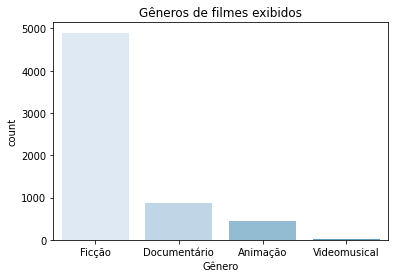

In [0]:
sns.countplot(filmesnovo['Gênero'], palette=palette) 
plt.title('Gêneros de filmes exibidos')

Nacionalidade das obras exibidas

Text(0.5, 1.0, 'Nacionalidade das obras exibidas')

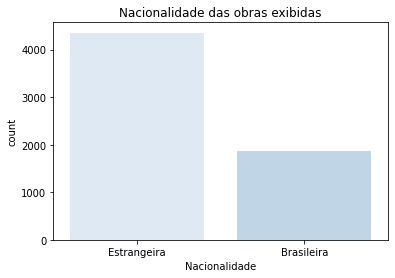

In [0]:
sns.countplot(filmesnovo['Nacionalidade'], palette=palette) 
plt.title('Nacionalidade das obras exibidas')

Origem da empresa distribuidora

Text(0.5, 1.0, 'Origem da empresa distribuidora')

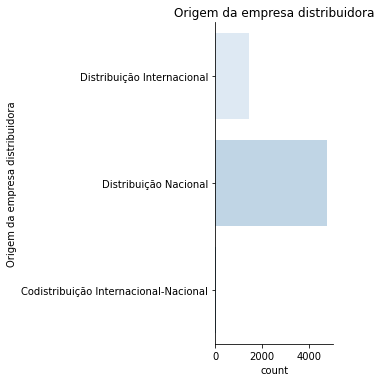

In [0]:
sns.catplot(y='Origem da empresa distribuidora', kind="count", palette=palette, data=filmesnovo);
plt.title('Origem da empresa distribuidora')

Correlação entre variáveis numéricas do DataFrame (filmesnovo)

In [0]:
filmesnovo.corr()

,Público,Renda
Público,1.000000,0.980076
Renda,0.980076,1.000000


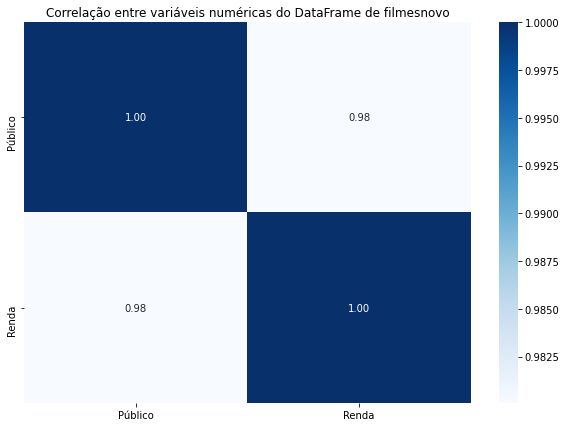

In [0]:
plt.figure(figsize=(10, 7))
sns.heatmap(filmesnovo.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis numéricas do DataFrame de filmesnovo')
plt.show()

Definindo o renderizador padrão colab

In [0]:
import plotly.io as pio
pio.renderers
pio.renderers.default = 'colab'

Plotando a distribuição do público com passar dos anos

In [0]:
import plotly.graph_objs as go
trace = [go.Scatter(x = ['2018',	'2017',	'2016',	'2015',	'2014',	'2013',	'2012',	'2011',	'2010',	'2009'],
                    y = filmes2.iloc[0, 1:11])]
data = [trace]
layout = go.Layout(title='Distribuição do público total com passar dos anos no cinemas do Brasil',
                   yaxis={'title':'Público (Milhões)'},
                   xaxis={'title': 'Ano de exibição'})
fig = go.Figure(data=trace, layout=layout)
py.iplot(fig)

Gráfico da Distribuição de público

In [0]:
trace = go.Scatter(x = ['2018',	'2017',	'2016',	'2015',	'2014',	'2013',	'2012',	'2011',	'2010',	'2009'],
                   y = filmes2.iloc[0, 1:11],
                   name = 'Distribuição Público Total',)

trace1 = go.Scatter(x = ['2018',	'2017',	'2016',	'2015',	'2014',	'2013',	'2012',	'2011',	'2010',	'2009'],
                    y = filmes2.iloc[3, 1:11],
                    mode = 'lines',
                    name = 'Público dos Filmes Brasileiros',
                    line = {'color': '#ee5253',
                            'dash': 'dash'})
# Gráfico de apenas linhas
trace2 = go.Scatter(x = ['2018',	'2017',	'2016',	'2015',	'2014',	'2013',	'2012',	'2011',	'2010',	'2009'],
                    y = filmes2.iloc[6, 1:11],
                    mode = 'lines',
                    name = 'Público dos Filmes Estrangeiros',
                    line = {'color': '#341f97',
                            'dash': 'dot'})
data = [trace, trace1, trace2]
layout = go.Layout(title = 'Público de Filmes Brasileiros e Estrangeiros')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Gráfico da Diferença entre Filmes Brasileiros e Estrangeiros

In [0]:
trace1 = go.Bar(x = ['2018',	'2017',	'2016',	'2015',	'2014',	'2013',	'2012',	'2011',	'2010',	'2009'],
                y = filmes2.iloc[3, 1:11],
                name = 'Público de Filmes Brasileiros',
                marker = {'color': '#feca57'})
trace2 = go.Bar(x = ['2018',	'2017',	'2016',	'2015',	'2014',	'2013',	'2012',	'2011',	'2010',	'2009'],
                y = filmes2.iloc[6, 1:11],
                name = 'Público de Filmes Estrangeiros',
                marker = {'color': '#ff9f43'})

data = [trace1, trace2]
layout = go.Layout(title = 'Público de Filmes Brasileiros e Estrangeiros')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Gráfico da Renda da Bilheteria dos Cinemas do Brasil

In [0]:
trace = go.Scatter(x=['2018',	'2017',	'2016',	'2015',	'2014',	'2013',	'2012',	'2011',	'2010',	'2009'],
                   y = filmes2.iloc[9, 1:11],
                   name = 'Distribuição Renda Total',)

trace1 = go.Scatter(x = ['2018',	'2017',	'2016',	'2015',	'2014',	'2013',	'2012',	'2011',	'2010',	'2009'],
                    y = filmes2.iloc[12, 1:11],
                    mode = 'lines',
                    name = 'Renda dos Filmes Brasileiros',
                    line = {'color': '#ee5253',
                            'dash': 'dash'})
# Gráfico de apenas linhas
trace2 = go.Scatter(x = ['2018',	'2017',	'2016',	'2015',	'2014',	'2013',	'2012',	'2011',	'2010',	'2009'],
                    y = filmes2.iloc[15, 1:11],
                    mode = 'lines',
                    name = 'Renda dos Filmes Estrangeiros',
                    line = {'color': '#341f97',
                            'dash': 'dot'})
data = [trace, trace1, trace2]
layout = go.Layout(title = 'Renda de Filmes Exibidos nos Cinemas do Brasil')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Gráfico Representa os Lançamentos de Filmes

In [0]:
trace = go.Bar(x = ['2018',	'2017',	'2016',	'2015',	'2014',	'2013',	'2012',	'2011',	'2010',	'2009'],
                y = filmes2.iloc[18, 1:11],
                name = 'Lançamentos Totais',
                marker = {'color': '#feca75'})
trace1 = go.Bar(x = ['2018',	'2017',	'2016',	'2015',	'2014',	'2013',	'2012',	'2011',	'2010',	'2009'],
                y = filmes2.iloc[21, 1:11],
                name = 'Lançamentos Brasileiros',
                marker = {'color': '#feca57'})
trace2 = go.Bar(x = ['2018',	'2017',	'2016',	'2015',	'2014',	'2013',	'2012',	'2011',	'2010',	'2009'],
                y = filmes2.iloc[24, 1:11],
                name = 'Lançamentos Estrangeiros',
                marker = {'color': '#ff9f43'})

data = [trace, trace1, trace2]
layout = go.Layout(title = 'Lançamentos de Filmes')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Gráfico Boxplot da Renda de Filmes Exibidos

In [0]:
# Gráfico de Renda Total de Filmes Exibidos
trace1 = go.Box(y = filmes2.iloc[9, 1:11],
                name = 'Renda Total de Exibição',
                marker = {'color': '#f39c12'})
# Gráfico de Renda Filmes Brasileiros
trace2 = go.Box(y = filmes2.iloc[12, 1:11],
                name = 'Renda Filmes Brasileiros',
                marker = {'color': '#e67e22'})
# Gráfico de Renda Filmes Estrangeiros
trace3 = go.Box(y = filmes2.iloc[15, 1:11],
                name = 'Renda Filmes Estrangeiros',
                marker = {'color': '#d35400'})

data = [trace1, trace2, trace3]
layout = go.Layout(title = 'Dispersão de Renda de Exibição de Filmes',
                   titlefont = {'family': 'Arial',
                                'size': 22,
                                'color': '#7f7f7f'},
                   xaxis = {'title': 'Renda de Exibição de Filmes '},
                   yaxis = {'title': 'Renda de Exibição'},
                   paper_bgcolor = 'rgb(243, 243, 243)',
                   plot_bgcolor = 'rgb(243, 243, 243)')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)